# Trading Strategies: EMA crossovers (9 & 21)

#### - Created by: Nirmit Patel
#### - Last edited by: Nirmit Patel
#### - Last edited on: 02/03/23

----------------------------------
### In this notebook the performance of a 9/21 EMA crossover strategy is tested on the following securities using 2022, daily trading data:
* AAPL
* ADP
* AWK
* MSFT 
------
* SPY 
* QQQ 

### Best performances (cumulative returns %): 
* SPY - 9.32
* QQQ - 8.18
* MSFT - 6.27


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing stock data
aapl = pd.read_csv('data/AAPL.csv')
adp = pd.read_csv('data/ADP.csv')
awk = pd.read_csv('data/AWK.csv')
msft = pd.read_csv('data/MSFT.csv')


In [7]:
# create ema columns for each dataset, and convert data columns to datetime type
for df in [aapl, adp, awk, msft]:
    df['EMA9'] = df['Close'].ewm(span=9, adjust=True).mean()
    df['EMA21'] = df['Close'].ewm(span=21, adjust=True).mean()
    
    df['Date'] = pd.to_datetime(df['Date'])
    

In [8]:
# lets slice each dataframe to 2022 only
aapl_2022 = aapl.set_index('Date').loc['2022-01-01':'2022-12-31']
adp_2022 = adp.set_index('Date').loc['2022-01-01':'2022-12-31']
awk_2022 = awk.set_index('Date').loc['2022-01-01':'2022-12-31']
msft_2022 = msft.set_index('Date').loc['2022-01-01':'2022-12-31']


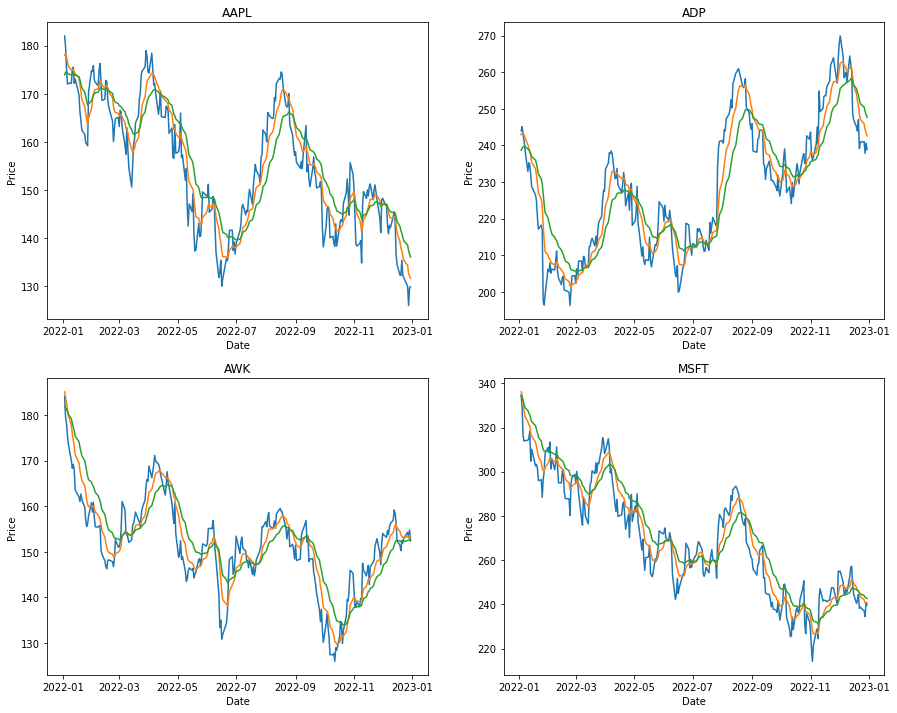

In [47]:
# lets plot each stock with the new ema's
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

ax = ax.flatten()

stock_list1 = ['AAPL', 'ADP', 'AWK', 'MSFT']

for i, df in enumerate([aapl_2022, adp_2022, awk_2022, msft_2022]):
    ax[i].plot(df.index, df['Close'], label = f'{df}'+ ' Close')
    ax[i].plot(df.index, df['EMA9'], label = f'{df}'+ ' EMA9')
    ax[i].plot(df.index, df['EMA21'], label = f'{df}'+ ' EMA21')
                       
    ax[i].set_title(f'{stock_list1[i]}')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Price')


## Let's define our strategy:

- Buy, if EMA9 crosses above EMA21. Close long when EMA9 crosses below EMA21.
- Sell, if EMA9 crosses below EMA21. Close short when EMA 9 crosses above EMA21.

In [72]:
for stock, df in {'AAPL' : aapl_2022,
                   'ADP'  : adp_2022,
                   'AWK'  : awk_2022,
                   'MSFT' : msft_2022}.items():
    
    df['Signal'] = 0 
    position = 0
    
    for i in range(1,len(df)):
        if df['EMA9'][i] > df['EMA21'][i] and df['EMA9'][i-1] <= df['EMA21'][i-1]:
            # long position
            position = 1
            # buy
            df['Signal'][i] = 1
            
        elif df['EMA9'][i] < df['EMA21'][i] and df['EMA9'][i-1] >= df['EMA21'][i-1]:
            # short position
            position = -1
            # sell
            df['Signal'][i] = -1
            
        elif df['EMA9'][i] < df['EMA21'][i] and position == 1:
            # close long
            position = 0 
            # sell
            df['Signal'][i] = -1
    
        elif df['EMA9'][i] > df['EMA21'][i] and position == -1:
            # close short
            position = 0  
            # buy
            df['Signal'][i] = 1
    
    df['Daily % Change'] = df['Close'].pct_change()
    df['Strategy Returns'] = df['Signal'].shift(1) * df['Daily % Change']
    df['Cumulative Returns'] = (1 + df['Strategy Returns']).cumprod()

    

<ipython-input-72-d93f4b7b6df9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][i] = -1
<ipython-input-72-d93f4b7b6df9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][i] = 1


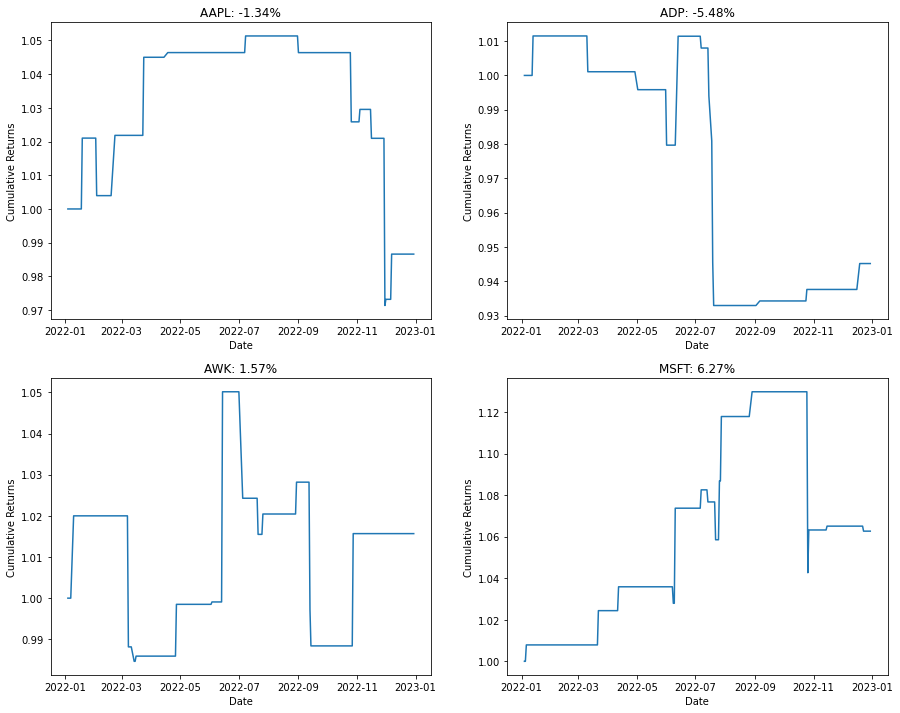

In [73]:
# lets plot the cumulative returns of AAPL, ADP, AWK, MSFT
fig2, ax2 = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

ax2 = ax2.flatten()

stock_names = ['AAPL', 'ADP', 'AWK', 'MSFT']
df_list = [aapl_2022, adp_2022, awk_2022, msft_2022]

for i, df in enumerate(df_list):
    
    ax2[i].plot(df.index, df['Cumulative Returns'])
    cumulative_returns = (df['Cumulative Returns'].iloc[-1] - 1) * 100
    ax2[i].set_title(f'{stock_names[i]}: ' + f'{cumulative_returns.round(2)}%')
    ax2[i].set_xlabel('Date')
    ax2[i].set_ylabel('Cumulative Returns')
    



### Let's test on the indexes

In [12]:
spy = pd.read_csv('data/SPY.csv')
qqq = pd.read_csv('data/QQQ.csv')

We need to make `Date` the index and make date the index

In [15]:
for df in [spy, qqq]:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace = True)

Now lets slice the datasets to 2022 and test the strategy

In [16]:
spy_2022 = spy.copy().loc['2022-01-01':'2022-12-31']
qqq_2022 = qqq.copy().loc['2022-01-01':'2022-12-31']

Create the 9EMA and 21EMA columns

In [17]:
for df in [spy_2022, qqq_2022]:
    df['EMA9'] = df['Close'].ewm(span=9, adjust=True).mean()
    df['EMA21'] = df['Close'].ewm(span=21, adjust=True).mean()

Lets plot the graphs side by side

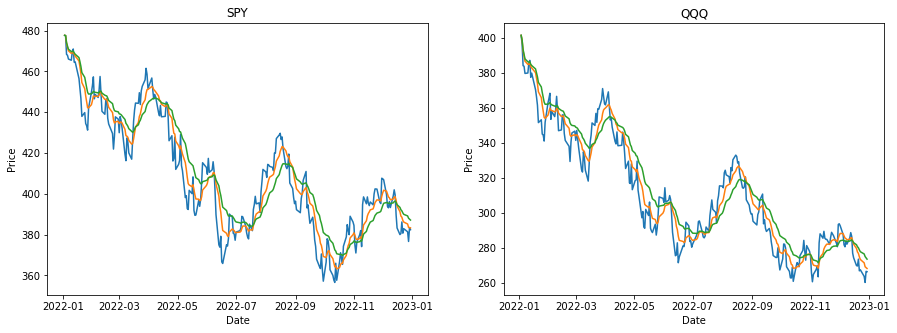

In [18]:
fig3, ax3 = plt.subplots(ncols=2, figsize=(15, 5))
ax3 = ax3.flatten()

index_names = ['SPY', 'QQQ']

for i, df in enumerate([spy_2022, qqq_2022]):
    ax3[i].plot(df.index, df['Close'], label = f'{df}'+ ' Close')
    ax3[i].plot(df.index, df['EMA9'], label = f'{df}'+ ' EMA9')
    ax3[i].plot(df.index, df['EMA21'], label = f'{df}'+ ' EMA21')
                       
    ax3[i].set_title(f'{index_names[i]}')
    ax3[i].set_xlabel('Date')
    ax3[i].set_ylabel('Price')

In [50]:
for stock, df in {'SPY' : spy_2022,
                   'QQQ'  : qqq_2022
                 }.items():
    
    df['Signal'] = 0 
    position = 0
    
    for i in range(1,len(df)):
        if df['EMA9'][i] > df['EMA21'][i] and df['EMA9'][i-1] <= df['EMA21'][i-1]:
            # Long position
            position = 1
            # Buy
            df['Signal'][i] = 1
            
        elif df['EMA9'][i] < df['EMA21'][i] and df['EMA9'][i-1] >= df['EMA21'][i-1]:
            # Short position
            position = -1
            # Sell
            df['Signal'][i] = -1
            
        elif df['EMA9'][i] < df['EMA21'][i] and position == 1:
            # Close long
            position = 0 
            # Sell
            df['Signal'][i] = -1
    
        elif df['EMA9'][i] > df['EMA21'][i] and position == -1:
            # Close short
            position = 0  
            # Buy
            df['Signal'][i] = 1
    
    df['Daily % Change'] = df['Close'].pct_change()
    df['Strategy Returns'] = df['Signal'].shift(1) * df['Daily % Change']
    df['Cumulative Returns'] = (1 + df['Strategy Returns']).cumprod()

    

<ipython-input-50-756f2044fbdf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][i] = -1
<ipython-input-50-756f2044fbdf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][i] = 1


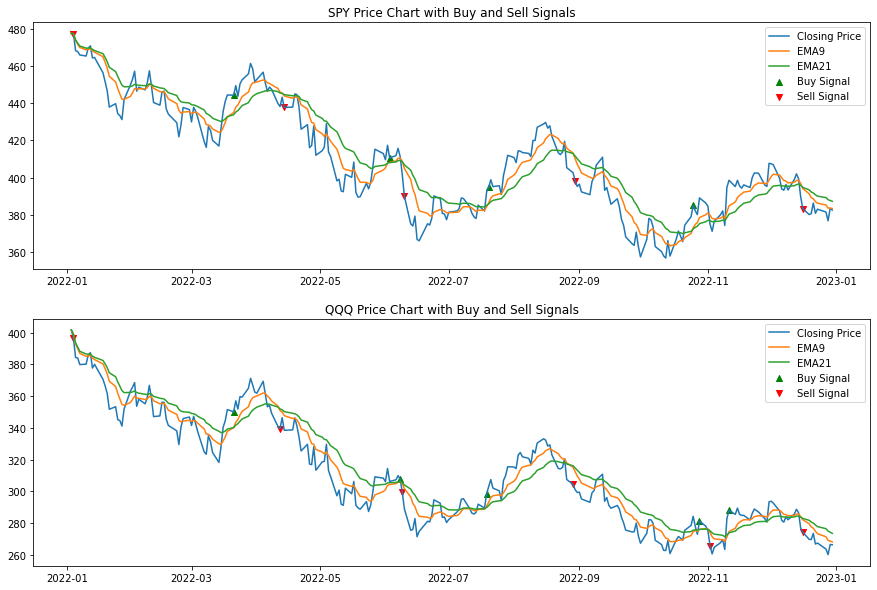

In [49]:
fig4, ax4 = plt.subplots(nrows=2, figsize=(15, 10))

ax4 = ax4.flatten()

index_list = ['SPY', 'QQQ']
for i, df in enumerate([spy_2022, qqq_2022]):
    
    ax4[i].plot(df.index, df['Close'], label='Closing Price')
    ax4[i].plot(df.index, df['EMA9'], label = 'EMA9')
    ax4[i].plot(df.index, df['EMA21'], label = 'EMA21')

    buy_signals = df[df['Signal'] == 1]
    sell_signals = df[df['Signal'] == -1]
    
    ax4[i].scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal')
    ax4[i].scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal')

    ax4[i].set_title(f'{index_list[i]} Price Chart with Buy and Sell Signals')

    ax4[i].legend()




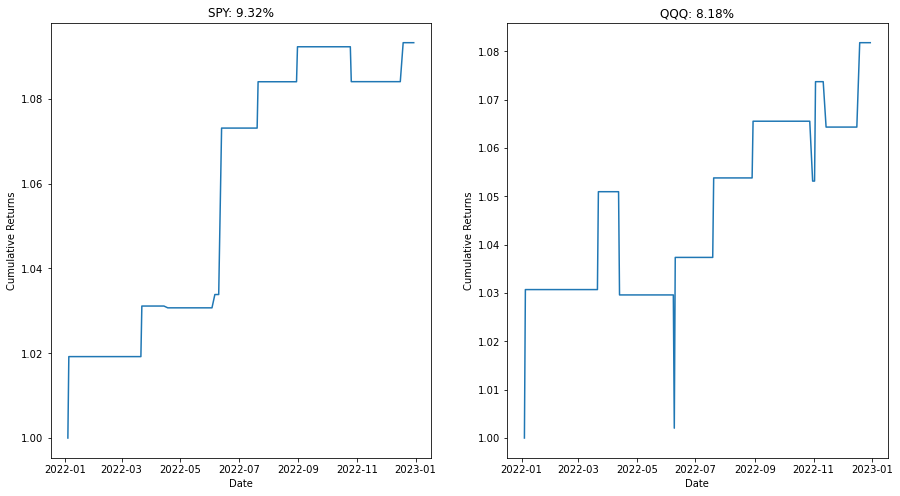

In [74]:
fig5, ax5 = plt.subplots(ncols=2, figsize=(15, 8))

ax5 = ax5.flatten()

for i, df in enumerate([spy_2022, qqq_2022]):
    
    ax5[i].plot(df.index, df['Cumulative Returns'])
    cumulative_returns = (df['Cumulative Returns'].iloc[-1] - 1) * 100
    ax5[i].set_title(f'{index_names[i]}: {cumulative_returns.round(2)}%')
    ax5[i].set_xlabel('Date')
    ax5[i].set_ylabel('Cumulative Returns')
    


## Conclusion

- At first glance the strategy performed okay, however, considering the fact that SPX and NASDAQ, returned -17.9% and -29.9% respectively in 2022, indicates that this strategy outperformed a traditional buy and hold strategy, which is good!
- Overall, we see the strategy works best on SPY(9.32%), QQQ(8.18%) and MSFT(6.27%)


## Next step?

Interested to test the below:

- Test strategy on different time frames
- Test a Long only or Short long version
- Add additional conditions for closing positions to reduce the loss